In [1]:
# program to predict the age of abalone by predicting the number of rings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.columns = df.columns.str.replace(' ','_')
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
df.shape

(4177, 9)

In [3]:
# Label Encoder for converting string values to numerical values
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])

In [4]:
LE.inverse_transform([0,1,2])

array(['F', 'I', 'M'], dtype=object)

In [5]:
df.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


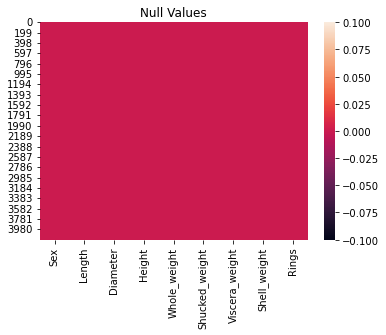

In [6]:
# check for null values in dataset
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [7]:
df.isnull().sum().sum()

0

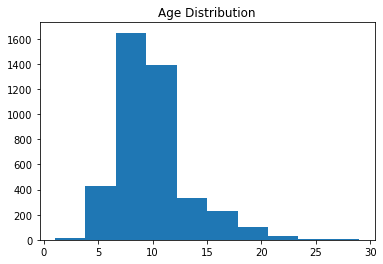

In [8]:
df['Rings'].hist(grid=False)
plt.title('Age Distribution')
plt.show()

In [9]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [10]:
df.corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

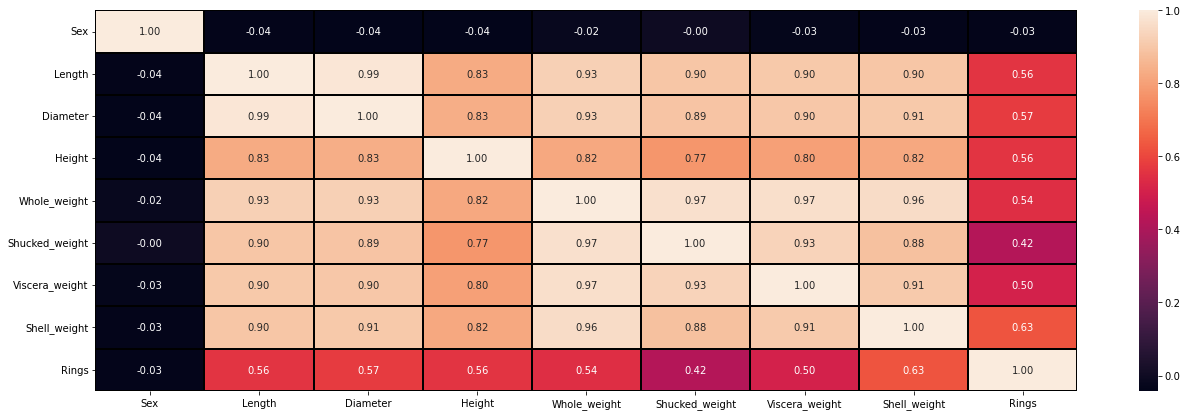

In [11]:
# checking for corelation
corr_mat = df.corr()
plt.figure(figsize=(22,7))
sns.heatmap(corr_mat,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [12]:
corr_mat['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell_weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole_weight      0.540390
Viscera_weight    0.503819
Shucked_weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

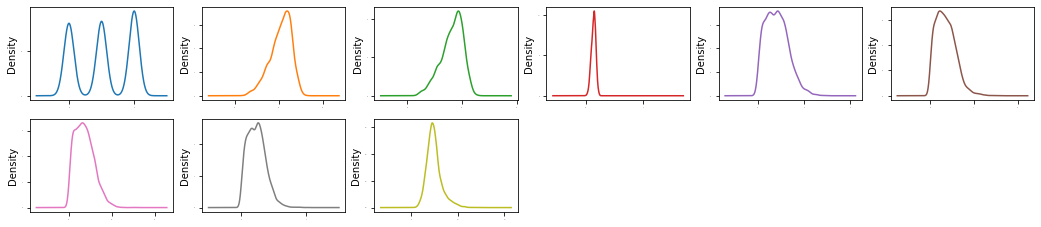

In [13]:
df.plot(kind='density',subplots=True,layout=(6,6),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

In [14]:
# Preprocessing
# spliting dependent and independent variables on x and y axis before removing skewness
x = df.drop('Rings',axis=1)
y = df['Rings']

In [15]:
x

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [16]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [17]:
x.skew().sort_values(ascending=False)

Height            3.128817
Shucked_weight    0.719098
Shell_weight      0.620927
Viscera_weight    0.591852
Whole_weight      0.530959
Sex              -0.098155
Diameter         -0.609198
Length           -0.639873
dtype: float64

In [18]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [19]:
x_new

array([[ 1.12707158, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [ 1.12707158, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [-1.30793479, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 1.12707158,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [-1.30793479,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 1.12707158,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

In [20]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

6    0.039780
5    0.027351
7    0.023390
4   -0.003980
2   -0.065977
1   -0.066669
3   -0.115483
0   -0.176442
dtype: float64

In [21]:
x.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')

In [22]:
x = pd.DataFrame(x_new,columns=x.columns)

In [23]:
x.skew().sort_values(ascending=False)

Viscera_weight    0.039780
Shucked_weight    0.027351
Shell_weight      0.023390
Whole_weight     -0.003980
Diameter         -0.065977
Length           -0.066669
Height           -0.115483
Sex              -0.176442
dtype: float64

In [24]:
sk = x.skew()

In [25]:
sk

Sex              -0.176442
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole_weight     -0.003980
Shucked_weight    0.027351
Viscera_weight    0.039780
Shell_weight      0.023390
dtype: float64

In [26]:
sk[np.abs(sk)>0.5]

Series([], dtype: float64)

In [27]:
x.skew()[np.abs(x.skew())<0.25].all()

True

In [45]:
# importing modules to train and test models
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor as rnd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

In [46]:
maxAccu = 0
maxRS = 0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)

fit_rnd = rnd.fit(x_train, y_train)

TypeError: fit() missing 1 required positional argument: 'y'

In [37]:
fit_rnd = rnd.fit(x_train,y_train)
rnd_score = rnd.score(x_test,y_test)
print('score of model is : ',rnd_score)
print('calculating the error')
rnd_MSE = mean_squared_error(y_test,predrf)
rnd_RMSE = np.sqrt(rnd_MSE)
print('mean squared error is : ',rnd_MSE)
print('root mean squared error is : ',rnd_RMSE)
print(classification_report(predrf,y_test))

TypeError: fit() missing 1 required positional argument: 'y'

In [38]:
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(rnd,open(file,'wb'))